In [536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [537]:
url = 'https://github.com/sehyunlee217/MIE368_proj/blob/main/watson_healthcare_modified.csv?raw=true'

In [538]:
# reading df from github repo
df = pd.read_csv(url)

In [539]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [540]:
df.isnull().sum()

,0
EmployeeID,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [541]:
df.drop(columns=['EmployeeID', 'EmployeeCount','Shift', 'StandardHours','Over18'], inplace=True)

In [542]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


In [543]:
# Split into training set
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
y = train_df['Attrition'].map({"Yes":1, "No":0})
X = train_df.drop(columns=['Attrition'])
train_df['Attrition'] = y

In [544]:
train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
832,35,0,Travel_Rarely,528,Neurology,8,4,Technical Degree,3,Male,...,17,3,2,6,2,1,5,4,1,4
266,31,0,Travel_Rarely,1463,Maternity,23,3,Medical,2,Male,...,21,4,2,10,2,3,9,0,7,8
148,41,0,Travel_Rarely,933,Maternity,9,4,Life Sciences,3,Male,...,21,4,4,7,2,3,5,0,1,4
383,22,0,Travel_Rarely,253,Maternity,11,3,Medical,1,Female,...,13,3,4,2,1,3,2,1,1,2
907,23,0,Travel_Rarely,373,Maternity,1,2,Life Sciences,4,Male,...,22,4,4,1,2,3,1,0,0,1


In [545]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
832,35,Travel_Rarely,528,Neurology,8,4,Technical Degree,3,Male,100,...,17,3,2,6,2,1,5,4,1,4
266,31,Travel_Rarely,1463,Maternity,23,3,Medical,2,Male,64,...,21,4,2,10,2,3,9,0,7,8
148,41,Travel_Rarely,933,Maternity,9,4,Life Sciences,3,Male,94,...,21,4,4,7,2,3,5,0,1,4
383,22,Travel_Rarely,253,Maternity,11,3,Medical,1,Female,43,...,13,3,4,2,1,3,2,1,1,2
907,23,Travel_Rarely,373,Maternity,1,2,Life Sciences,4,Male,47,...,22,4,4,1,2,3,1,0,0,1


In [546]:
y.value_counts()

,count
Attrition,
0,1188
1,152


In [547]:
# Select Dtype columns that are non-string(ints,floats,..)
num_columns = train_df.select_dtypes(exclude=['object']).columns
# Select string-type columns
str_columns = [col for col in df.columns if col not in num_columns]

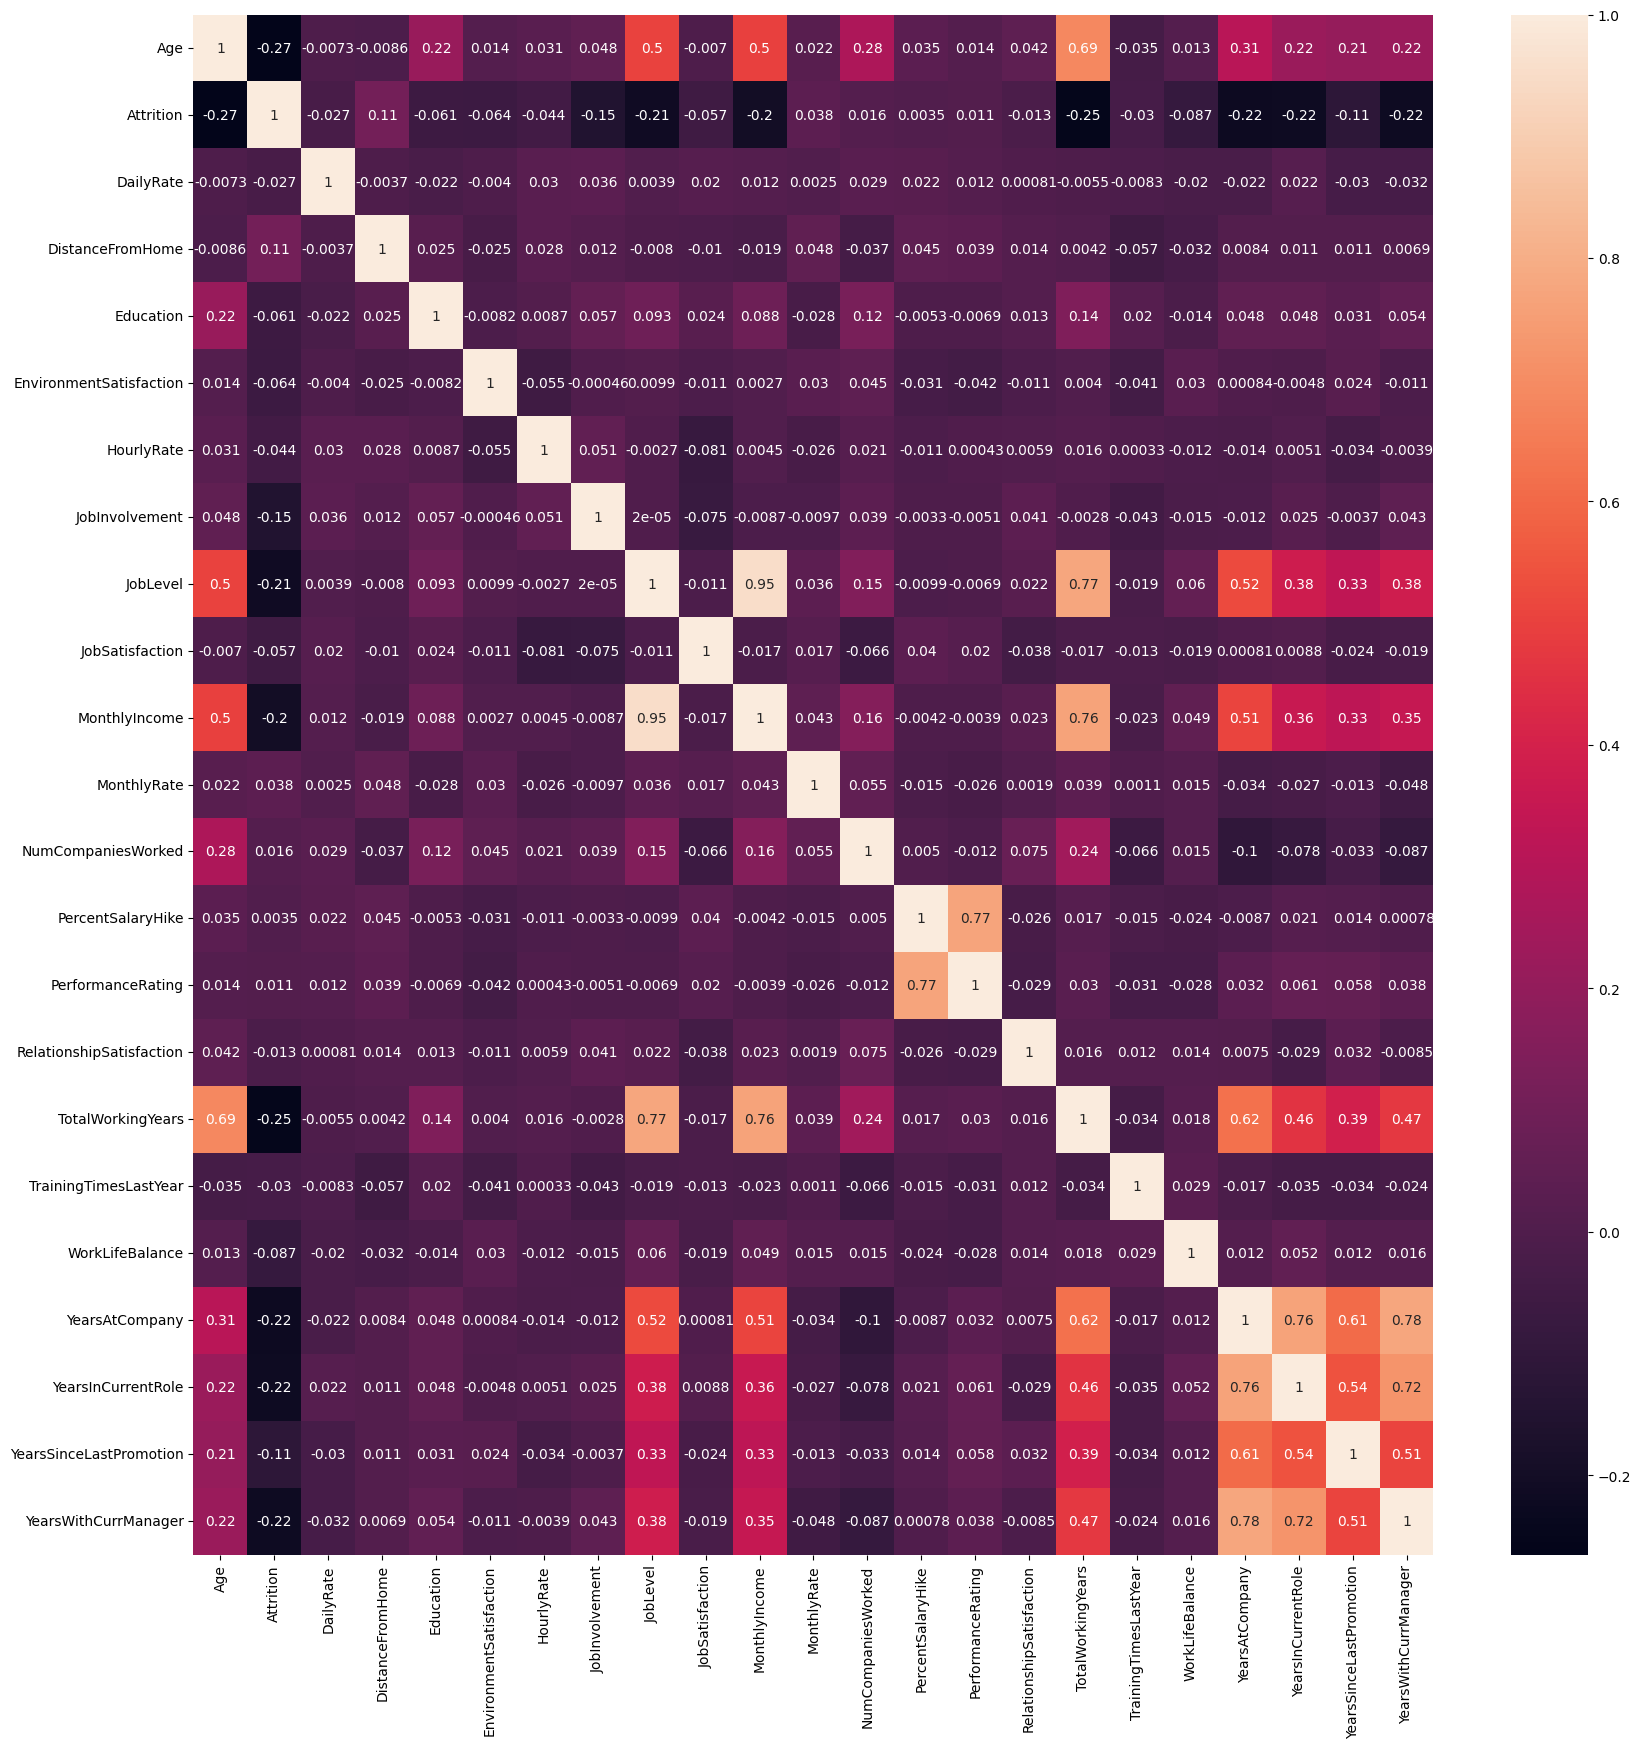

In [548]:
# Let's check correlation between numerical columns
cor = train_df[num_columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)
plt.show()

In [549]:
# Get first 5 most correlated features
cor['Attrition'].sort_values(ascending=True)[:5]

,Attrition
Age,-0.265005
TotalWorkingYears,-0.251768
YearsAtCompany,-0.223826
YearsInCurrentRole,-0.217669
YearsWithCurrManager,-0.216137


In [550]:
# Let's check point biserial correlation between numerical v.s target
# Store p_values for each pair
pv_dict = {}
alpha = 0.05

for col in num_columns:
    if stats.pointbiserialr(train_df[col], y).pvalue < alpha:
        pv_dict[col] = stats.pointbiserialr(train_df[col], y).pvalue

pv_dict.pop('Attrition')
sorted(pv_dict.items(), key=lambda x: x[1])[:5]

[('Age', 5.691523229016833e-23),
 ('TotalWorkingYears', 8.066721393319492e-21),
 ('YearsAtCompany', 1.1218501185465574e-16),
 ('YearsInCurrentRole', 7.796807429534771e-16),
 ('YearsWithCurrManager', 1.2516699403579664e-15)]

### We seem to get consistent result from correlation and biserial correlation against Attrition

- So Age, TotalWorkignYears, YearsInCurrentRole, JobLevel, and YearsAtCompany seem to be potential counfounding factors.
- Now, let's encode the categorical features and check for significant features; Remember that correlation can only be calculated for continuous/numerical features. That's why we did these tests on numerical features first.

In [551]:
# Columns that were not numerical
train_df[str_columns]

# Let's check how many categories these non-numerical features have
for col in str_columns:
    print(f"{col} | number of types: {len(train_df[col].unique())}")
    print(train_df[col].unique(), "\n")

# We want to check which of these are ordinal or nominal
# if ordinal, mapping to values workds
# if nominal, one-hot encoding

BusinessTravel | number of types: 3
['Travel_Rarely' 'Non-Travel' 'Travel_Frequently'] 

Department | number of types: 3
['Neurology' 'Maternity' 'Cardiology'] 

EducationField | number of types: 6
['Technical Degree' 'Medical' 'Life Sciences' 'Marketing' 'Other'
 'Human Resources'] 

Gender | number of types: 2
['Male' 'Female'] 

JobRole | number of types: 5
['Other' 'Nurse' 'Therapist' 'Administrative' 'Admin'] 

MaritalStatus | number of types: 3
['Single' 'Married' 'Divorced'] 

OverTime | number of types: 2
['No' 'Yes'] 



In [552]:
train_df[str_columns]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
832,Travel_Rarely,Neurology,Technical Degree,Male,Other,Single,No
266,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,No
148,Travel_Rarely,Maternity,Life Sciences,Male,Nurse,Married,No
383,Travel_Rarely,Maternity,Medical,Female,Other,Married,No
907,Travel_Rarely,Maternity,Life Sciences,Male,Other,Married,No
...,...,...,...,...,...,...,...
1130,Travel_Rarely,Maternity,Technical Degree,Male,Nurse,Divorced,No
1294,Travel_Rarely,Neurology,Medical,Female,Other,Married,Yes
860,Travel_Rarely,Neurology,Human Resources,Male,Other,Married,No
1459,Non-Travel,Cardiology,Medical,Male,Therapist,Single,No


## now we can check the types of our features
Binary variables: Gender, Overtime

Ordinal: BusinessTravel

Nominal: Department, EducationField, JobRole, MartialStatus

In [553]:
# first map binary and ordinal features to numerical
train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['OverTime'] = train_df['OverTime'].map({'No': 0, 'Yes': 1})
train_df['BusinessTravel'] = train_df['BusinessTravel'].map(
    {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2})

# Confirm we converted these variables
train_df[['Gender','OverTime','BusinessTravel']].head()

,Gender,OverTime,BusinessTravel
832,0,0,1
266,0,0,1
148,0,0,1
383,1,0,1
907,0,0,1


In [554]:
from sklearn import preprocessing as p

In [555]:
train_df[str_columns].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
832,1,Neurology,Technical Degree,0,Other,Single,0
266,1,Maternity,Medical,0,Nurse,Married,0
148,1,Maternity,Life Sciences,0,Nurse,Married,0
383,1,Maternity,Medical,1,Other,Married,0
907,1,Maternity,Life Sciences,0,Other,Married,0


In [556]:
# We only want to hot-encode nominal variables
cols_nom = ['Department','EducationField','JobRole','MaritalStatus']

nom_df = train_df[cols_nom]

In [557]:
# Apply one-hot encoding to nominal variables
encoder = p.OneHotEncoder()

encoder.fit(nom_df)
onehotlables = encoder.transform(nom_df)

encoded_cols = pd.DataFrame(onehotlables.toarray(), columns=encoder.get_feature_names_out(), dtype=int)

In [558]:
train_df.shape

(1340, 30)

In [559]:
encoded_cols.shape

(1340, 17)

In [560]:
# Now we join he tables with the one-hot encoded features
# Need to reset index first
encoded_cols.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)
# Drop all string columns
train_df.drop(columns=cols_nom, inplace=True)
# Merge the encoded columns
train_df = pd.concat([train_df, encoded_cols], axis=1)

In [561]:
print(train_df.shape)
train_df.head()

(1340, 43)


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0,1,0,0,0,1,0,0,0,1
1,31,0,1,1463,23,3,2,0,64,2,...,0,0,0,0,1,0,0,0,1,0
2,41,0,1,933,9,4,3,0,94,3,...,0,0,0,0,1,0,0,0,1,0
3,22,0,1,253,11,3,1,1,43,3,...,0,0,0,0,0,1,0,0,1,0
4,23,0,1,373,1,2,4,0,47,3,...,0,0,0,0,0,1,0,0,1,0


We can see that we have 13 more features due to the encoding. But now we can reapply correlation and even do some PCA.

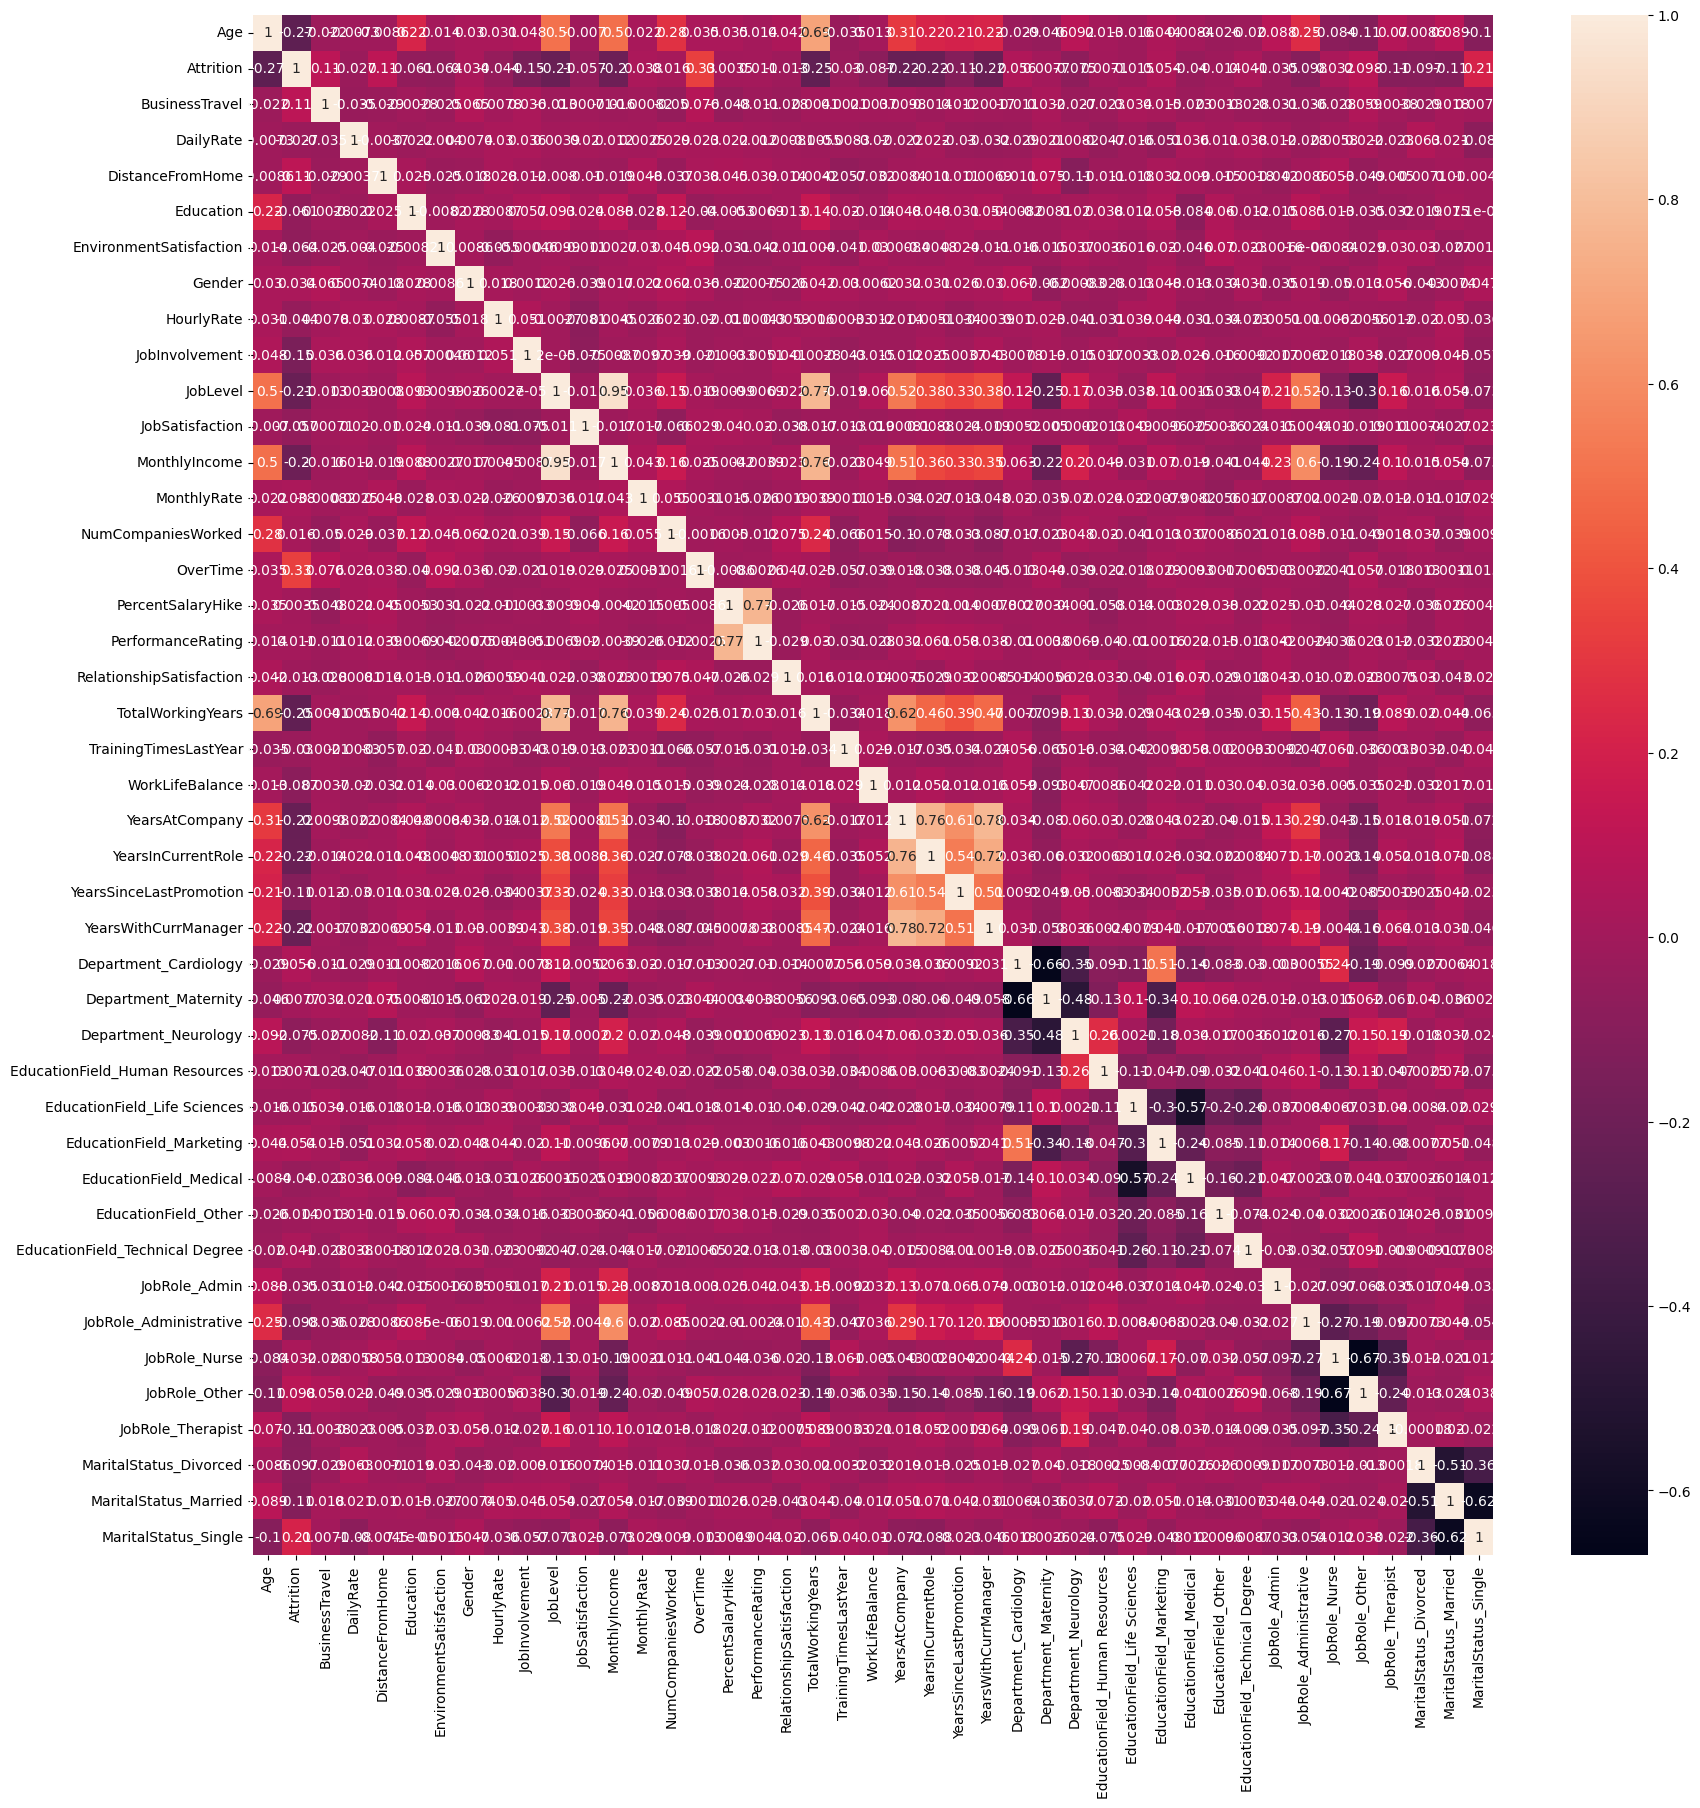

In [562]:
cor_total = train_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_total, annot=True)
plt.show()

In [563]:
# Check the most significant features
print('Positive Correlation')
print(cor_total['Attrition'].sort_values(ascending=False)[:10])

Positive Correlation
Attrition                          1.000000
OverTime                           0.332156
MaritalStatus_Single               0.211890
DistanceFromHome                   0.106450
BusinessTravel                     0.105479
JobRole_Other                      0.098173
Department_Cardiology              0.055974
EducationField_Marketing           0.054145
EducationField_Technical Degree    0.040519
MonthlyRate                        0.038192
Name: Attrition, dtype: float64


In [564]:
print('Negative Correlation')
print(cor_total['Attrition'].sort_values(ascending=True)[:10])

Negative Correlation
Age                       -0.265005
TotalWorkingYears         -0.251768
YearsAtCompany            -0.223826
YearsInCurrentRole        -0.217669
YearsWithCurrManager      -0.216137
JobLevel                  -0.213407
MonthlyIncome             -0.201071
JobInvolvement            -0.152721
MaritalStatus_Married     -0.114291
YearsSinceLastPromotion   -0.114095
Name: Attrition, dtype: float64


In [565]:
train_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Other,EducationField_Technical Degree,JobRole_Admin,JobRole_Administrative,JobRole_Nurse,JobRole_Other,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35,0,1,528,8,4,3,0,100,3,...,0,1,0,0,0,1,0,0,0,1
1,31,0,1,1463,23,3,2,0,64,2,...,0,0,0,0,1,0,0,0,1,0
2,41,0,1,933,9,4,3,0,94,3,...,0,0,0,0,1,0,0,0,1,0
3,22,0,1,253,11,3,1,1,43,3,...,0,0,0,0,0,1,0,0,1,0
4,23,0,1,373,1,2,4,0,47,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,43,0,1,990,27,3,4,0,87,4,...,0,1,0,0,1,0,0,1,0,0
1336,26,0,1,920,20,2,4,1,69,3,...,0,0,0,0,0,1,0,0,1,0
1337,33,0,1,147,2,3,2,0,99,3,...,0,0,0,0,0,1,0,0,1,0
1338,31,0,0,325,5,3,2,0,74,3,...,0,0,0,0,0,0,1,0,0,1


In [566]:
from sklearn import decomposition as decomp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [567]:
scaler = StandardScaler()
scaler.fit(train_df)
train_df = scaler.transform(train_df)
pca = decomp.PCA(n_components = len(cor_total.columns))
pca.fit(train_df)
X = pca.transform(train_df)

In [568]:
pca.explained_variance_ratio_

array([0.12076761, 0.05646589, 0.04799879, 0.04252101, 0.04069045,
       0.04018036, 0.03783514, 0.0353916 , 0.03213059, 0.0301189 ,
       0.02907294, 0.02837326, 0.02697444, 0.02635758, 0.02526514,
       0.0247762 , 0.02438488, 0.02376918, 0.02332416, 0.02268339,
       0.02209491, 0.02185066, 0.02150131, 0.02091034, 0.02074532,
       0.02004895, 0.01892258, 0.01812038, 0.01711351, 0.0156059 ,
       0.01340787, 0.01214462, 0.01004941, 0.00831351, 0.00630458,
       0.00523269, 0.00442495, 0.00322536, 0.00090165, 0.        ,
       0.        , 0.        , 0.        ])

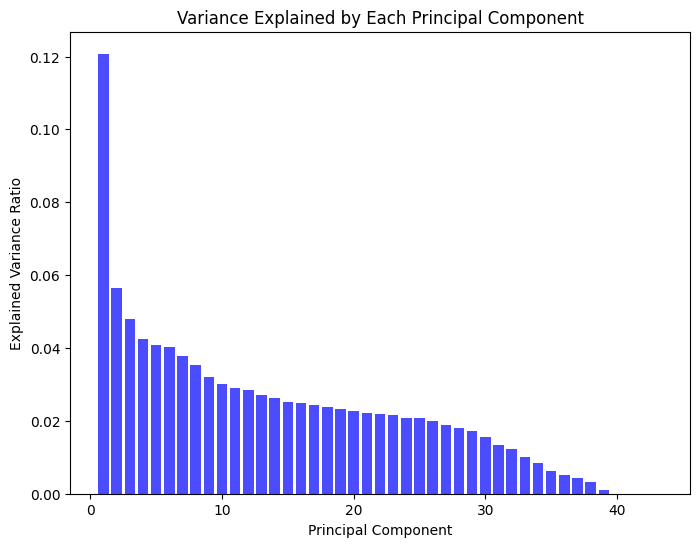

In [570]:
# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Principal Component')
plt.show()



In [572]:
import numpy as np
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required to explain at least 90% of the variance
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Number of principal components to explain 90% of the variance: {num_components_90}")

Number of principal components to explain 90% of the variance: 28


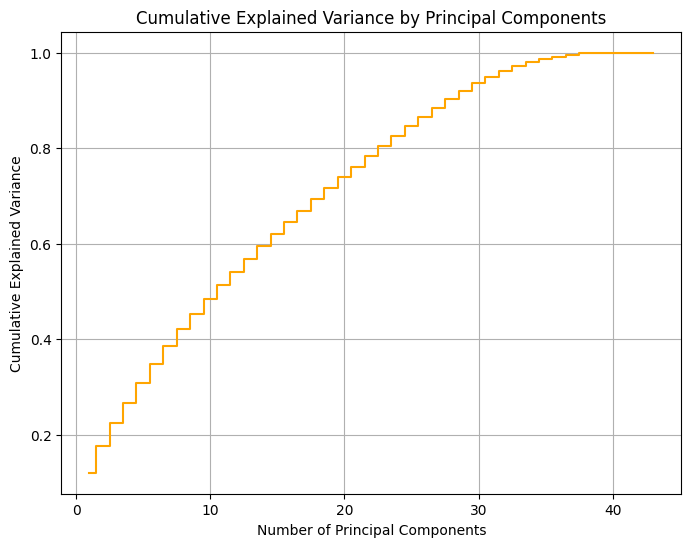

In [573]:
plt.figure(figsize=(8, 6))
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), where='mid', color='orange')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid()
plt.show()